In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('C:/Users/16156/Documents/NSS_Projects/un_data_question-essetetsahai/data/gdp_per_capita.csv')

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


In [4]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN
6869,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [5]:
gdp_df = gdp_df[:-2]

In [6]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [7]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)

In [8]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


In [9]:
gdp_df = gdp_df.rename(columns ={'Country or Area':'Country', 'Value': 'GDP_Per_Capita'})

In [10]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [11]:
gdp_df.shape

(6868, 3)

gdp has 6,868 rows and 3 columns

In [12]:
gdp_df.dtypes

Country            object
Year               object
GDP_Per_Capita    float64
dtype: object

In [13]:
gdp_df = gdp_df.astype({"Country":'string', "Year": int})

In [14]:
gdp_df.dtypes

Country            string
Year                int32
GDP_Per_Capita    float64
dtype: object

7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [15]:
gdp_df['Year'].describe()

count    6868.000000
mean     2004.829354
std         8.573176
min      1990.000000
25%      1998.000000
50%      2005.000000
75%      2012.000000
max      2019.000000
Name: Year, dtype: float64

<AxesSubplot:>

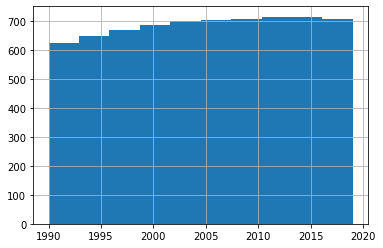

In [16]:
gdp_df['Year'].hist()

The histogram shows that there are slightly more observation in the years 2010- 2015

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [17]:
gdp_df['Country'].describe()

count      6868
unique      238
top       Malta
freq         30
Name: Country, dtype: object

In [18]:
gdp_df['Country'].value_counts()

Malta                        30
Ireland                      30
Suriname                     30
Nicaragua                    30
The Bahamas                  30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: Int64

There are 238 countries represented in the dataset. 
The countries list represented are Djibouti, Turks and Caicos Islands. They may have few observations because ?? 

9. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [19]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

In [20]:
gdp_2014.head()

,Country,Year,GDP_Per_Capita
5,Afghanistan,2014,2102.385234
23,Albania,2014,11623.866679
53,Algeria,2014,11512.705405
83,Angola,2014,8239.828837
113,Antigua and Barbuda,2014,18104.241470


10. Use .describe() to find the summary statistics for GDP per capita in 2014.

In [21]:
gdp_2014['GDP_Per_Capita'].describe()

count       238.000000
mean      19766.710348
std       20983.869623
min         822.610458
25%        4753.110934
50%       12209.385755
75%       26803.610474
max      156514.133850
Name: GDP_Per_Capita, dtype: float64

11. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

(array([24., 28., 15., 12.,  7.,  7., 19., 13.,  9., 12.,  5.,  7.,  4.,
         1.,  4.,  7.,  5.,  4.,  1.,  3.,  4.,  2.,  3.,  3.,  1.,  3.,
         1.,  4.,  2.,  2.,  4.,  2.,  1.,  3.,  0.,  3.,  3.,  0.,  0.,
         2.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   822.61045782,   2379.52569174,   3936.44092566,   5493.35615958,
          7050.2713935 ,   8607.18662742,  10164.10186133,  11721.01709525,
         13277.93232917,  14834.84756309,  16391.76279701,  17948.67803093,
         19505.59326485,  21062.50849877,  22619.42373269,  24176.33896661,
         25733.25420053,  27290.16943445,  28847.08466837,  30403.99990229,
         31960.91513621,  33517.83037013,  35074.74560

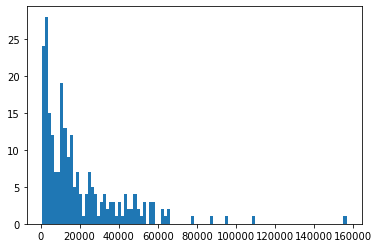

In [22]:
plt.hist(gdp_2014['GDP_Per_Capita'], bins = 100)

The distribution is skewed right. 

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [23]:
gdp_2014.sort_values('GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541
...,...,...,...
561,Bermuda,2014,77361.104881
5464,Singapore,2014,87808.663157
5138,Qatar,2014,95578.416973
3691,Luxembourg,2014,108760.916030


13. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [24]:
gdp_pivoted = gdp_df[(gdp_df['Year'] >= 1990) & (gdp_df['Year'] <=2017)]
gdp_pivoted = gdp_pivoted.pivot(index = 'Country', columns = 'Year', values = 'GDP_Per_Capita')
gdp_pivoted.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1484.114729,1758.904043,1957.029338,1904.559799,2075.491747,2116.465454,2102.385234,2068.265904,2057.062164,2058.383832
Albania,4842.734635,3507.746654,3275.444336,3610.520633,3934.375728,4486.152092,4924.905836,4414.631173,4834.778357,5492.654212,...,9944.233283,10346.864199,10783.816180,11088.087801,11263.851342,11397.576226,11623.866679,11916.422315,12331.127754,12811.759436
Algeria,8746.352901,8431.385028,8383.770248,8027.376688,7792.085182,7935.179841,8116.962721,8074.759953,8360.150339,8506.345679,...,10796.901320,10782.361398,10970.705149,11078.240516,11233.534926,11319.097949,11512.705405,11696.963757,11826.164666,11737.409353
Angola,5783.429064,5649.782130,5148.252824,3788.508107,3717.366881,4139.640473,4551.651329,4728.157560,4792.683851,4740.669833,...,7864.375304,7643.493749,7692.434616,7675.445768,8036.690482,8140.527851,8239.828837,8036.410610,7568.997643,7310.901738
Antigua and Barbuda,15459.551675,15586.896172,15497.464744,15991.764201,16697.248772,15628.396992,16303.723892,16828.640823,17258.964856,17551.305968,...,23130.553123,20046.839017,18205.985369,17604.417102,17965.502327,17641.542533,18104.241470,18595.084904,19417.964819,19840.076123


In [25]:
#Drop rows

gdp_pivoted = gdp_pivoted.dropna()
gdp_pivoted.shape

(207, 28)

14. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [26]:
gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2017] - gdp_pivoted[1990])/gdp_pivoted[1990]
gdp_pivoted.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Albania,4842.734635,3507.746654,3275.444336,3610.520633,3934.375728,4486.152092,4924.905836,4414.631173,4834.778357,5492.654212,...,10346.864199,10783.816180,11088.087801,11263.851342,11397.576226,11623.866679,11916.422315,12331.127754,12811.759436,164.556297
Algeria,8746.352901,8431.385028,8383.770248,8027.376688,7792.085182,7935.179841,8116.962721,8074.759953,8360.150339,8506.345679,...,10782.361398,10970.705149,11078.240516,11233.534926,11319.097949,11512.705405,11696.963757,11826.164666,11737.409353,34.197756
Angola,5783.429064,5649.782130,5148.252824,3788.508107,3717.366881,4139.640473,4551.651329,4728.157560,4792.683851,4740.669833,...,7643.493749,7692.434616,7675.445768,8036.690482,8140.527851,8239.828837,8036.410610,7568.997643,7310.901738,26.411194
Antigua and Barbuda,15459.551675,15586.896172,15497.464744,15991.764201,16697.248772,15628.396992,16303.723892,16828.640823,17258.964856,17551.305968,...,20046.839017,18205.985369,17604.417102,17965.502327,17641.542533,18104.241470,18595.084904,19417.964819,19840.076123,28.335391
Arab World,9694.667544,9651.626577,9933.531454,9927.649928,9957.387061,9913.934988,10136.058519,10311.064917,10624.718674,10606.027497,...,13063.094140,13347.112066,13531.438796,14032.961703,14155.876986,14219.562395,14441.436785,14663.549625,14555.474921,50.138980


15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [27]:
neg_percent_chg = gdp_pivoted[gdp_pivoted['Percent_Change'] < 0]
neg_percent_chg.shape[0]

17

16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
    Bonus: Put both line charts on the same plot.